<a href="https://colab.research.google.com/github/Sidshan123/CommunityClassroom-Git/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/dl.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  dl.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3296.jpg', 'with_mask_2076.jpg', 'with_mask_2246.jpg', 'with_mask_688.jpg', 'with_mask_2583.jpg']
['with_mask_35.jpg', 'with_mask_777.jpg', 'with_mask_673.jpg', 'with_mask_278.jpg', 'with_mask_2416.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2806.jpg', 'without_mask_14.jpg', 'without_mask_2688.jpg', 'without_mask_821.jpg', 'without_mask_1332.jpg']
['without_mask_3052.jpg', 'without_mask_3272.jpg', 'without_mask_2504.jpg', 'without_mask_2543.jpg', 'without_mask_3076.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

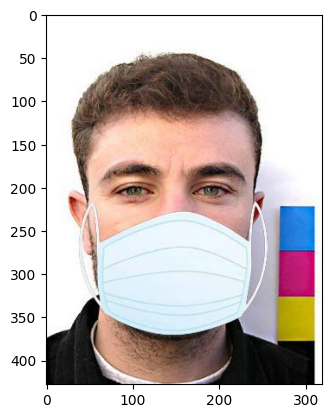

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1987.jpg')
imgplot = plt.imshow(img)
plt.show()

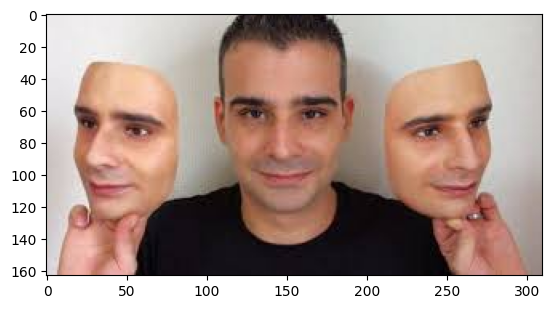

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2227.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[19, 32, 57],
        [18, 32, 58],
        [18, 32, 58],
        ...,
        [21, 36, 63],
        [20, 36, 62],
        [20, 36, 62]],

       [[19, 32, 58],
        [19, 32, 58],
        [18, 32, 58],
        ...,
        [21, 36, 61],
        [21, 35, 61],
        [21, 36, 62]],

       [[19, 32, 56],
        [19, 32, 58],
        [19, 32, 58],
        ...,
        [22, 35, 61],
        [22, 35, 61],
        [22, 36, 62]],

       ...,

       [[22, 18, 56],
        [22, 18, 55],
        [21, 20, 56],
        ...,
        [22, 22, 56],
        [23, 22, 56],
        [24, 22, 56]],

       [[22, 17, 57],
        [23, 18, 57],
        [23, 19, 57],
        ...,
        [23, 22, 56],
        [23, 22, 56],
        [23, 22, 56]],

       [[22, 17, 57],
        [22, 18, 57],
        [23, 18, 58],
        ...,
        [23, 23, 57],
        [23, 23, 57],
        [24, 23, 57]]], dtype=uint8)
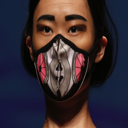

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[247, 247, 249],
        [247, 247, 249],
        [247, 247, 249],
        ...,
        [225, 231, 237],
        [225, 231, 237],
        [227, 230, 238]],

       [[247, 247, 249],
        [247, 247, 249],
        [247, 247, 249],
        ...,
        [225, 229, 237],
        [224, 229, 237],
        [225, 229, 238]],

       [[245, 245, 247],
        [245, 245, 247],
        [245, 245, 247],
        ...,
        [223, 228, 235],
        [221, 227, 234],
        [220, 225, 233]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
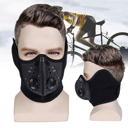

In [32]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.42745098, 0.41960784, 0.4627451 ],
        [0.44705882, 0.44313725, 0.4745098 ],
        [0.42745098, 0.41960784, 0.45490196],
        ...,
        [0.35294118, 0.38039216, 0.41960784],
        [0.35294118, 0.36862745, 0.41176471],
        [0.36470588, 0.38039216, 0.42352941]],

       [[0.43137255, 0.42352941, 0.46666667],
        [0.43529412, 0.42352941, 0.45882353],
        [0.43137255, 0.41176471, 0.44705882],
        ...,
        [0.3372549 , 0.36470588, 0.40392157],
        [0.34509804, 0.36078431, 0.40392157],
        [0.34901961, 0.36470588, 0.40784314]],

       [[0.43921569, 0.41960784, 0.4627451 ],
        [0.44313725, 0.42745098, 0.4627451 ],
        [0.48235294, 0.45882353, 0.49019608],
        ...,
        [0.34901961, 0.37254902, 0.41176471],
        [0.35686275, 0.37254902, 0.41568627],
        [0.34117647, 0.35686275, 0.4       ]],

       ...,

       [[0.18039216, 0.25882353, 0.35686275],
        [0.17647059, 0.25490196, 0.35294118],
        [0.18431373, 0

**Building a Convolutional Neural Networks (CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.7417 - loss: 0.5742 - val_acc: 0.8744 - val_loss: 0.2657
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8922 - loss: 0.2696 - val_acc: 0.8793 - val_loss: 0.2312
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9114 - loss: 0.2193 - val_acc: 0.9190 - val_loss: 0.2017
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9300 - loss: 0.1786 - val_acc: 0.9107 - val_loss: 0.2102
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9386 - loss: 0.1760 - val_acc: 0.9190 - val_loss: 0.2176


**Model Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9264 - loss: 0.2257
Test Accuracy = 0.9278623461723328


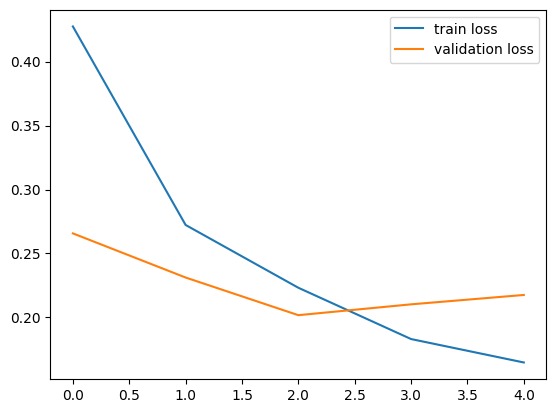

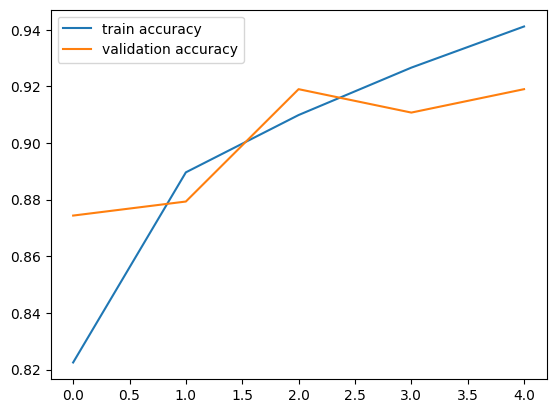

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.png


AttributeError: 'NoneType' object has no attribute 'clip'

Path of the image to be predicted: /content/data/with_mask/with_mask_1987.jpg


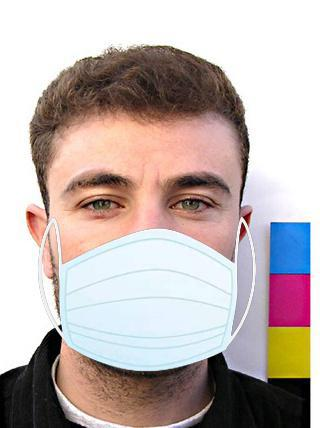

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
[[0.19148248 0.56782126]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')